In [10]:
from src.env.chess import ChessEnv
from src.agent.random_agent import RandomAgent

env = ChessEnv()
agent = RandomAgent()
env.render()
state = env.reset()
done = False

while not done:
    # Agent selects a move based on the current state
    move = agent.select_move(state)
    print(f"Agent selects move: {move}")
    state, reward, done, info = env.step(move)
    env.render()
    print("-" * 40)

print(f"Game finished with reward: {reward}")


r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
Agent selects move: c2c4
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . P . . . . .
. . . . . . . .
P P . P P P P P
R N B Q K B N R
----------------------------------------
Agent selects move: b8c6
r . b q k b n r
p p p p p p p p
. . n . . . . .
. . . . . . . .
. . P . . . . .
. . . . . . . .
P P . P P P P P
R N B Q K B N R
----------------------------------------
Agent selects move: d1b3
r . b q k b n r
p p p p p p p p
. . n . . . . .
. . . . . . . .
. . P . . . . .
. Q . . . . . .
P P . P P P P P
R N B . K B N R
----------------------------------------
Agent selects move: a7a5
r . b q k b n r
. p p p p p p p
. . n . . . . .
p . . . . . . .
. . P . . . . .
. Q . . . . . .
P P . P P P P P
R N B . K B N R
----------------------------------------
Agent selects move: e2e4
r . b q k b n r
. p p p p p p p
. . n . . . . .
p . . . . . . .
. . P .

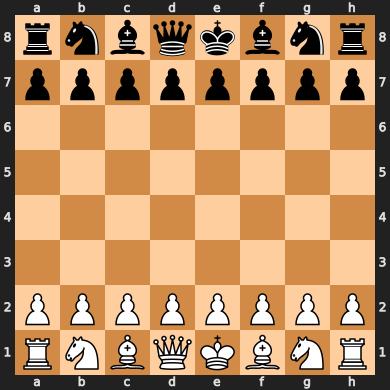

In [56]:
env.board

In [64]:
import importlib

# Import the module initially
chess_env_module = importlib.import_module("src.env.chess")
ChessEnv = chess_env_module.ChessEnv

# Force reload the module to reflect any changes
chess_env_module = importlib.reload(chess_env_module)
ChessEnv = chess_env_module.ChessEnv  # Reassign the class after reloading

# Now you can use the updated ChessEnv
env = ChessEnv()  # This will use the latest version of ChessEnv

In [20]:
import importlib

# Import the module initially
q_learning_agent_module = importlib.import_module("src.agent.q_learning_agent")
QLearningAgent = q_learning_agent_module.QLearningAgent

# Force reload the module to reflect any changes
q_learning_agent_module = importlib.reload(q_learning_agent_module)
QLearningAgent = q_learning_agent_module.QLearningAgent  # Reassign the class after reloading

# Now you can use the updated QLearningAgent
agent = QLearningAgent(env)  # Assuming `env` is already defined

In [12]:
from src.env.chess import ChessEnv
from src.agent.q_learning_agent import QLearningAgent

# Initialize environment and agent
env = ChessEnv()
agent = QLearningAgent(learning_rate=0.1, discount_factor=0.9,
                       exploration_rate=1.0, exploration_decay=0.995)

num_episodes = 1000

for episode in range(num_episodes):
    state = env.reset()
    done = False
    episode_reward = 0

    while not done:
        # Agent selects a move based on the current state
        action = agent.select_move(state)
        if action is None:
            break

        next_state, reward, done, _ = env.step(action)
        episode_reward += reward

        # Update Q-value based on the transition
        agent.update_q_value(state, action, reward, next_state, done)
        state = next_state

    # Record the cumulative reward for this episode and decay exploration
    agent.record_episode_reward(episode_reward)
    agent.decay_exploration()

    if (episode + 1) % 50 == 0:
        print(f"Episode {episode + 1}/{num_episodes}, Cumulative Reward: {episode_reward}, Epsilon: {agent.epsilon:.3f}")

# Optionally, plot the reward evolution using matplotlib
import matplotlib.pyplot as plt

plt.plot(agent.get_reward_history())
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Reward Evolution over Episodes")
plt.show()


Episode 50/1000, Cumulative Reward: 0.5, Epsilon: 0.778
Episode 100/1000, Cumulative Reward: -1, Epsilon: 0.606
Episode 150/1000, Cumulative Reward: 0.5, Epsilon: 0.471
Episode 200/1000, Cumulative Reward: -1, Epsilon: 0.367
Episode 250/1000, Cumulative Reward: 0.5, Epsilon: 0.286
Episode 300/1000, Cumulative Reward: 0.5, Epsilon: 0.222
Episode 350/1000, Cumulative Reward: 0.5, Epsilon: 0.173
Episode 400/1000, Cumulative Reward: 0.5, Epsilon: 0.135
Episode 450/1000, Cumulative Reward: 0.5, Epsilon: 0.105


KeyboardInterrupt: 

In [24]:
import chess
import chess.svg
from IPython.display import display, SVG

def visualize_chessboard(state):
    """
    Visualize the chessboard given a state.
    Assumes `state` is a chess.Board object or similar.
    """
    if isinstance(state, chess.Board):
        display(SVG(chess.svg.board(board=state)))
    else:
        print("State is not a chess.Board object. Visualization not supported.")

Episode 50/1000, Cumulative Reward: 42, Epsilon: 0.778
Episode 100/1000, Cumulative Reward: 38, Epsilon: 0.606
Episode 150/1000, Cumulative Reward: 39, Epsilon: 0.471
Episode 200/1000, Cumulative Reward: 35, Epsilon: 0.367
Episode 250/1000, Cumulative Reward: 11, Epsilon: 0.286
Episode 300/1000, Cumulative Reward: 36, Epsilon: 0.222
Episode 350/1000, Cumulative Reward: 5, Epsilon: 0.173
Episode 400/1000, Cumulative Reward: 4, Epsilon: 0.135
Episode 450/1000, Cumulative Reward: 5, Epsilon: 0.105
Episode 500/1000, Cumulative Reward: 17, Epsilon: 0.082
Episode 550/1000, Cumulative Reward: 2, Epsilon: 0.063
Episode 600/1000, Cumulative Reward: 4, Epsilon: 0.049
Episode 650/1000, Cumulative Reward: 5, Epsilon: 0.038
Episode 700/1000, Cumulative Reward: 2, Epsilon: 0.030
Episode 750/1000, Cumulative Reward: 5, Epsilon: 0.023
Episode 800/1000, Cumulative Reward: 5, Epsilon: 0.018
Episode 850/1000, Cumulative Reward: 5, Epsilon: 0.014
Episode 900/1000, Cumulative Reward: 5, Epsilon: 0.011
Epis

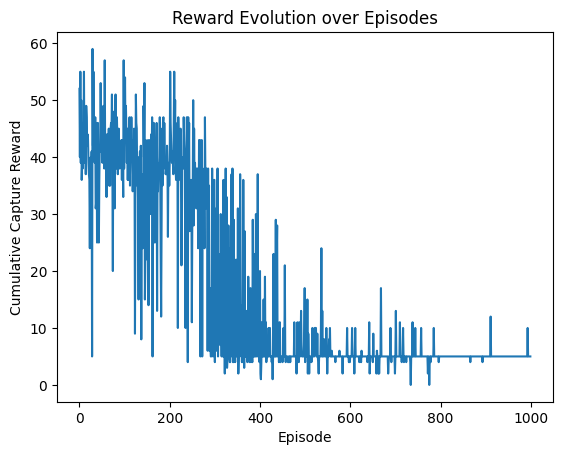


--- Game Evolution Visualization ---
Initial Board:
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R

Board after move g1h3:
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . N
P P P P P P P P
R N B Q K B . R
----------------------------------------

Board after move g7g5:
r n b q k b n r
p p p p p p . p
. . . . . . . .
. . . . . . p .
. . . . . . . .
. . . . . . . N
P P P P P P P P
R N B Q K B . R
----------------------------------------

Board after move h3g5:
r n b q k b n r
p p p p p p . p
. . . . . . . .
. . . . . . N .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B . R
----------------------------------------

Board after move g8h6:
r n b q k b . r
p p p p p p . p
. . . . . . . n
. . . . . . N .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B . R
----------------------------------------

Board after move g5h7:
r n b q k b . r
p p p p

In [26]:
import time
import matplotlib.pyplot as plt
from src.env.chess import ChessEnv
from src.agent.q_learning_agent import QLearningAgent

# Initialize environment and agent
env = ChessEnv()
agent = QLearningAgent(learning_rate=0.1, discount_factor=0.9,
                       exploration_rate=1.0, exploration_decay=0.995)

num_episodes = 1000

# Training loop
for episode in range(num_episodes):
    state = env.reset()
    done = False
    episode_reward = 0

    while not done:
        # Agent selects a move based on the current state
        action = agent.select_move(state)
        if action is None:
            break

        next_state, reward, done, _ = env.step(action)
        episode_reward += reward

        # Update Q-value based on the transition
        agent.update_q_value(state, action, reward, next_state, done)
        state = next_state

    # Record the cumulative reward for this episode and decay exploration
    agent.record_episode_reward(episode_reward)
    agent.decay_exploration()

    if (episode + 1) % 50 == 0:
        print(f"Episode {episode + 1}/{num_episodes}, Cumulative Reward: {episode_reward}, Epsilon: {agent.epsilon:.3f}")

# Plot the reward evolution over episodes
plt.plot(agent.get_reward_history())
plt.xlabel("Episode")
plt.ylabel("Cumulative Capture Reward")
plt.title("Reward Evolution over Episodes")
plt.show()

# Visualize the evolution of one game using the trained agent
print("\n--- Game Evolution Visualization ---")
state = env.reset()
print("Initial Board:")
print(env.board)  # Directly printing the chess.Board object
time.sleep(1)
done = False

while not done:
    action = agent.select_move(state)
    if action is None:
        break

    state, reward, done, _ = env.step(action)
    print("\nBoard after move {}:".format(action))
    print(env.board)  # Displaying the updated board state directly
    print("-" * 40)
    time.sleep(1)


Episode 50/1000, Cumulative Reward: 38, Epsilon: 0.778
Episode 100/1000, Cumulative Reward: 43, Epsilon: 0.606
Episode 150/1000, Cumulative Reward: 47, Epsilon: 0.471
Episode 200/1000, Cumulative Reward: 14, Epsilon: 0.367
Episode 250/1000, Cumulative Reward: 47, Epsilon: 0.286
Episode 300/1000, Cumulative Reward: 40, Epsilon: 0.222
Episode 350/1000, Cumulative Reward: 12, Epsilon: 0.173
Episode 400/1000, Cumulative Reward: 22, Epsilon: 0.135
Episode 450/1000, Cumulative Reward: 4, Epsilon: 0.105
Episode 500/1000, Cumulative Reward: 4, Epsilon: 0.082
Episode 550/1000, Cumulative Reward: 12, Epsilon: 0.063
Episode 600/1000, Cumulative Reward: 12, Epsilon: 0.049
Episode 650/1000, Cumulative Reward: 12, Epsilon: 0.038
Episode 700/1000, Cumulative Reward: 12, Epsilon: 0.030
Episode 750/1000, Cumulative Reward: 12, Epsilon: 0.023
Episode 800/1000, Cumulative Reward: 4, Epsilon: 0.018
Episode 850/1000, Cumulative Reward: 12, Epsilon: 0.014
Episode 900/1000, Cumulative Reward: 12, Epsilon: 0.

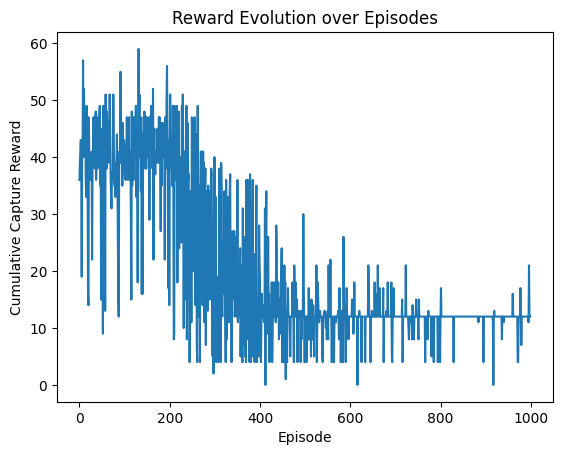

In [21]:
from src.env.chess import ChessEnv
from src.agent.q_learning_agent import QLearningAgent

# Initialize environment and agent
env = ChessEnv()
agent = QLearningAgent(learning_rate=0.1, discount_factor=0.9,
                       exploration_rate=1.0, exploration_decay=0.995)

num_episodes = 1000

for episode in range(num_episodes):
    state = env.reset()
    done = False
    episode_reward = 0

    while not done:
        # Agent selects a move based on the current state
        action = agent.select_move(state)
        if action is None:
            break

        next_state, reward, done, _ = env.step(action)
        episode_reward += reward

        # Update Q-value based on the transition
        agent.update_q_value(state, action, reward, next_state, done)
        state = next_state

    # Record the cumulative reward for this episode and decay exploration
    agent.record_episode_reward(episode_reward)
    agent.decay_exploration()

    if (episode + 1) % 50 == 0:
        print(f"Episode {episode + 1}/{num_episodes}, Cumulative Reward: {episode_reward}, Epsilon: {agent.epsilon:.3f}")

# Optionally, plot the reward evolution using matplotlib
import matplotlib.pyplot as plt

plt.plot(agent.get_reward_history())
plt.xlabel("Episode")
plt.ylabel("Cumulative Capture Reward")
plt.title("Reward Evolution over Episodes")
plt.show()


Episode 5/1000, Cumulative Reward: 40, Epsilon: 0.975
Episode 10/1000, Cumulative Reward: 43, Epsilon: 0.951
Episode 15/1000, Cumulative Reward: 38, Epsilon: 0.928
Episode 20/1000, Cumulative Reward: 38, Epsilon: 0.905
Episode 25/1000, Cumulative Reward: 47, Epsilon: 0.882
Episode 30/1000, Cumulative Reward: 45, Epsilon: 0.860
Episode 35/1000, Cumulative Reward: 40, Epsilon: 0.839
Episode 40/1000, Cumulative Reward: 46, Epsilon: 0.818
Episode 45/1000, Cumulative Reward: 44, Epsilon: 0.798
Episode 50/1000, Cumulative Reward: 37, Epsilon: 0.778
Episode 55/1000, Cumulative Reward: 14, Epsilon: 0.759
Episode 60/1000, Cumulative Reward: 41, Epsilon: 0.740
Episode 65/1000, Cumulative Reward: 48, Epsilon: 0.722
Episode 70/1000, Cumulative Reward: 48, Epsilon: 0.704
Episode 75/1000, Cumulative Reward: 5, Epsilon: 0.687
Episode 80/1000, Cumulative Reward: 48, Epsilon: 0.670
Episode 85/1000, Cumulative Reward: 33, Epsilon: 0.653
Episode 90/1000, Cumulative Reward: 16, Epsilon: 0.637
Episode 95/1

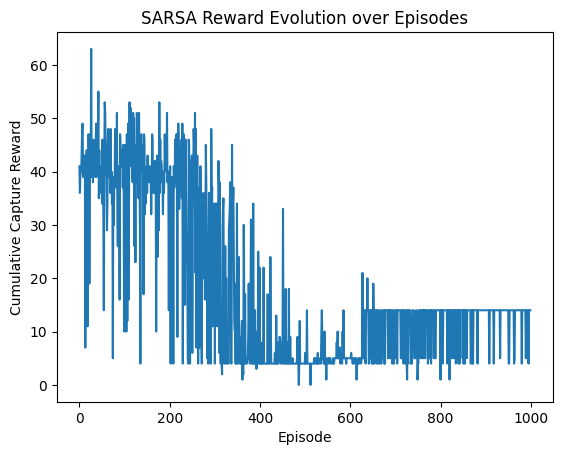

In [28]:
from src.env.chess import ChessEnv
from src.agent.sarsa_agent import SARSAAgent

# Initialize environment and SARSA agent
env = ChessEnv()
agent = SARSAAgent(learning_rate=0.1, discount_factor=0.9,
                   exploration_rate=1.0, exploration_decay=0.995)

num_episodes = 1000

for episode in range(num_episodes):
    state = env.reset()
    done = False
    episode_reward = 0
    
    # Select initial action for the starting state
    action = agent.select_move(state)

    while not done:
        next_state, reward, done, _ = env.step(action)
        episode_reward += reward
        
        # Select next action based on the new state (if not terminal)
        next_action = agent.select_move(next_state) if not done else None
        
        # Update the Q-value using the SARSA update rule
        agent.update_q_value(state, action, reward, next_state, next_action, done)
        
        state = next_state
        action = next_action

    # Record the cumulative reward for the episode and decay the exploration rate
    agent.record_episode_reward(episode_reward)
    agent.decay_exploration()

    if (episode + 1) % 5 == 0:
        print(f"Episode {episode + 1}/{num_episodes}, Cumulative Reward: {episode_reward}, Epsilon: {agent.epsilon:.3f}")

# Optionally, you can plot the reward evolution using matplotlib
import matplotlib.pyplot as plt

plt.plot(agent.get_reward_history())
plt.xlabel("Episode")
plt.ylabel("Cumulative Capture Reward")
plt.title("SARSA Reward Evolution over Episodes")
plt.show()


## SARSA vs Q learning

Training Q-learning agent...
Episode 50/1000 - Reward: 41.00, Epsilon: 0.778
Episode 100/1000 - Reward: 38.00, Epsilon: 0.606
Episode 150/1000 - Reward: 38.00, Epsilon: 0.471
Episode 200/1000 - Reward: 28.00, Epsilon: 0.367
Episode 250/1000 - Reward: 38.00, Epsilon: 0.286
Episode 300/1000 - Reward: 26.00, Epsilon: 0.222
Episode 350/1000 - Reward: 36.00, Epsilon: 0.173
Episode 400/1000 - Reward: 13.00, Epsilon: 0.135
Episode 450/1000 - Reward: 13.00, Epsilon: 0.105
Episode 500/1000 - Reward: 22.00, Epsilon: 0.082
Episode 550/1000 - Reward: 13.00, Epsilon: 0.063
Episode 600/1000 - Reward: 13.00, Epsilon: 0.049
Episode 650/1000 - Reward: 14.00, Epsilon: 0.038
Episode 700/1000 - Reward: 10.00, Epsilon: 0.030
Episode 750/1000 - Reward: 14.00, Epsilon: 0.023
Episode 800/1000 - Reward: 13.00, Epsilon: 0.018
Episode 850/1000 - Reward: 14.00, Epsilon: 0.014
Episode 900/1000 - Reward: 14.00, Epsilon: 0.011
Episode 950/1000 - Reward: 13.00, Epsilon: 0.010
Episode 1000/1000 - Reward: 14.00, Epsilo

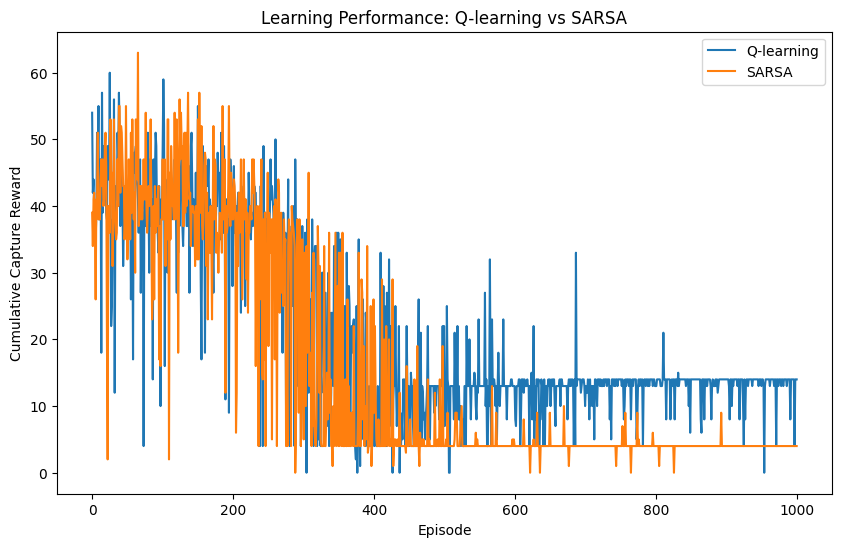

In [29]:
import time
import matplotlib.pyplot as plt
from src.env.chess import ChessEnv
from src.agent.q_learning_agent import QLearningAgent
from src.agent.sarsa_agent import SARSAAgent

def train_agent(agent, num_episodes=1000):
    """
    Train an agent (either Q-learning or SARSA) on the chess environment.
    Returns a list of cumulative rewards per episode.
    """
    env = ChessEnv()
    reward_history = []
    
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        episode_reward = 0
        
        # For SARSA, select an initial action before entering the loop.
        if hasattr(agent, 'update_q_value') and 'next_action' in agent.update_q_value.__code__.co_varnames:
            action = agent.select_move(state)
        
        while not done:
            if isinstance(agent, SARSAAgent):
                # SARSA: choose next action in the current loop.
                next_state, reward, done, _ = env.step(action)
                episode_reward += reward
                next_action = agent.select_move(next_state) if not done else None
                agent.update_q_value(state, action, reward, next_state, next_action, done)
                state, action = next_state, next_action
            else:
                # Q-learning: no need to select an initial action.
                action = agent.select_move(state)
                next_state, reward, done, _ = env.step(action)
                episode_reward += reward
                agent.update_q_value(state, action, reward, next_state, done)
                state = next_state
        
        agent.record_episode_reward(episode_reward)
        agent.decay_exploration()
        reward_history.append(episode_reward)
        
        if (episode + 1) % 50 == 0:
            print(f"Episode {episode + 1}/{num_episodes} - Reward: {episode_reward:.2f}, Epsilon: {agent.epsilon:.3f}")
    
    return reward_history

# Set the number of training episodes.
num_episodes = 1000

# Create both agents with similar hyperparameters.
q_agent = QLearningAgent(learning_rate=0.1, discount_factor=0.9,
                         exploration_rate=1.0, exploration_decay=0.995)
sarsa_agent = SARSAAgent(learning_rate=0.1, discount_factor=0.9,
                         exploration_rate=1.0, exploration_decay=0.995)

# Train each agent.
print("Training Q-learning agent...")
q_rewards = train_agent(q_agent, num_episodes)
print("Training SARSA agent...")
sarsa_rewards = train_agent(sarsa_agent, num_episodes)

# Plot the learning curves.
plt.figure(figsize=(10,6))
plt.plot(q_rewards, label='Q-learning')
plt.plot(sarsa_rewards, label='SARSA')
plt.xlabel("Episode")
plt.ylabel("Cumulative Capture Reward")
plt.title("Learning Performance: Q-learning vs SARSA")
plt.legend()
plt.show()


In [41]:
import chess
from src.env.chess import ChessEnv
from src.agent.q_learning_agent import QLearningAgent
from src.agent.sarsa_agent import SARSAAgent

def play_match(q_agent, sarsa_agent, verbose=True):
    """
    Plays a single game between the Q-learning agent (White) and the SARSA agent (Black).
    Sets both agents to exploitation mode (epsilon = 0) so they act deterministically.
    
    Args:
        q_agent: Instance of QLearningAgent (plays White).
        sarsa_agent: Instance of SARSAAgent (plays Black).
        verbose (bool): If True, prints each move and the board state.
    
    Returns:
        winner (str): A string indicating the winner or if it's a draw.
    """
    # Set epsilon to 0 for both agents to force exploitation.
    q_agent.epsilon = 0.1
    sarsa_agent.epsilon = 0.1

    # Create a fresh chess environment.
    env = ChessEnv()
    state = env.reset()
    done = False

    if verbose:
        print("Initial Board:")
        print(env.board)
        print("---------------------")

    # Continue until the game is over.
    while not done:
        if env.board.turn == chess.WHITE:
            # Q-learning agent plays as White.
            move = q_agent.select_move(state)
        else:
            # SARSA agent plays as Black.
            move = sarsa_agent.select_move(state)
        
        if move is None:
            break
        
        state, reward, done, info = env.step(move)
        
        if verbose:
            print(f"Move played: {move}")
            print(env.board)
            print("---------------------")

    # Determine winner using the board result.
    result = env.board.result()  # "1-0" (White wins), "0-1" (Black wins), or "1/2-1/2" (draw)
    if result == "1-0":
        winner = "Q-Learning Agent (White) wins"
    elif result == "0-1":
        winner = "SARSA Agent (Black) wins"
    else:
        winner = "Draw"
    
    return winner

if __name__ == "__main__":
    # Initialize agents with any hyperparameters as desired.
    # Here we set exploration_rate to 0 to avoid any randomness during the match.
    q_agent = QLearningAgent(learning_rate=0.1, discount_factor=0.9,
                             exploration_rate=0.2, exploration_decay=0.995)
    sarsa_agent = SARSAAgent(learning_rate=0.1, discount_factor=0.9,
                             exploration_rate=0.2, exploration_decay=0.995)

    # Optionally, if you have already trained these agents, load their Q-tables here.

    # Play a match between the two agents.
    L = []
    for i in range(200) : 
        winner = play_match(q_agent, sarsa_agent, verbose=True)
        L.append(winner)
    print(set(L))


Initial Board:
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
---------------------
Move played: g1h3
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . N
P P P P P P P P
R N B Q K B . R
---------------------
Move played: g7g5
r n b q k b n r
p p p p p p . p
. . . . . . . .
. . . . . . p .
. . . . . . . .
. . . . . . . N
P P P P P P P P
R N B Q K B . R
---------------------
Move played: e2e4
r n b q k b n r
p p p p p p . p
. . . . . . . .
. . . . . . p .
. . . . P . . .
. . . . . . . N
P P P P . P P P
R N B Q K B . R
---------------------
Move played: g8h6
r n b q k b . r
p p p p p p . p
. . . . . . . n
. . . . . . p .
. . . . P . . .
. . . . . . . N
P P P P . P P P
R N B Q K B . R
---------------------
Move played: h3g5
r n b q k b . r
p p p p p p . p
. . . . . . . n
. . . . . . N .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B . R
-----------------

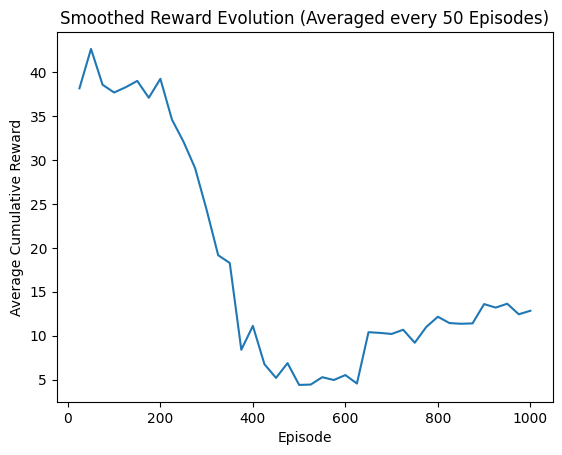

In [46]:
import matplotlib.pyplot as plt

# Assume reward_history is a list containing the cumulative reward per episode.
reward_history = agent.get_reward_history()

block_size = 25
avg_rewards = []
episodes = []

# Compute average reward for every block of 50 episodes.
for i in range(0, len(reward_history), block_size):
    block = reward_history[i:i + block_size]
    avg_rewards.append(sum(block) / len(block))
    episodes.append(i + block_size)

plt.plot(episodes, avg_rewards)
plt.xlabel("Episode")
plt.ylabel("Average Cumulative Reward")
plt.title("Smoothed Reward Evolution (Averaged every 50 Episodes)")
plt.show()


In [47]:
item_counts = {}

for item in L:
    if item in item_counts:
        item_counts[item] += 1
    else:
        item_counts[item] = 1

print(item_counts)

{'Draw': 198, 'SARSA Agent (Black) wins': 1, 'Q-Learning Agent (White) wins': 1}


In [55]:
import tkinter as tk
import chess
from src.env.chess import ChessEnv
from src.agent.q_learning_agent import QLearningAgent

# Constants for board drawing.
SQUARE_SIZE = 60
BOARD_SIZE = SQUARE_SIZE * 8

# Unicode mapping for chess pieces.
piece_unicode = {
    chess.PAWN:   {"white": "\u2659", "black": "\u265F"},
    chess.KNIGHT: {"white": "\u2658", "black": "\u265E"},
    chess.BISHOP: {"white": "\u2657", "black": "\u265D"},
    chess.ROOK:   {"white": "\u2656", "black": "\u265C"},
    chess.QUEEN:  {"white": "\u2655", "black": "\u265B"},
    chess.KING:   {"white": "\u2654", "black": "\u265A"},
}

class ChessGUI:
    def __init__(self, master, human_color="white"):
        self.master = master
        master.title("Chess: Human vs Q-learning Agent")
        self.canvas = tk.Canvas(master, width=BOARD_SIZE, height=BOARD_SIZE)
        self.canvas.pack()

        # Determine human's color (should be "white" or "black").
        self.human_color = human_color.lower()

        # Initialize environment and agent.
        self.env = ChessEnv()
        self.agent = QLearningAgent(learning_rate=0.2, discount_factor=0.9,
                                    exploration_rate=1, exploration_decay=0.995)
        # Set agent to exploitation mode.
        self.agent.epsilon = 0.1

        # Reset environment and get the initial state.
        self.state = self.env.reset()

        # Variable to keep track of the human-selected square.
        self.selected_square = None

        # Bind mouse click events on the canvas.
        self.canvas.bind("<Button-1>", self.on_canvas_click)

        # Draw the initial board.
        self.draw_board()

    def draw_board(self):
        """Draws the board squares and pieces onto the canvas."""
        self.canvas.delete("all")
        colors = ["#F0D9B5", "#B58863"]  # Light and dark square colors.
        # Draw squares.
        for row in range(8):
            for col in range(8):
                color = colors[(row + col) % 2]
                x1 = col * SQUARE_SIZE
                y1 = row * SQUARE_SIZE
                x2 = x1 + SQUARE_SIZE
                y2 = y1 + SQUARE_SIZE
                self.canvas.create_rectangle(x1, y1, x2, y2, fill=color, tags="square")
        # Highlight selected square if any.
        if self.selected_square is not None:
            row, col = self.selected_square
            x1 = col * SQUARE_SIZE
            y1 = row * SQUARE_SIZE
            x2 = x1 + SQUARE_SIZE
            y2 = y1 + SQUARE_SIZE
            self.canvas.create_rectangle(x1, y1, x2, y2, outline="red", width=3, tags="highlight")
        # Draw pieces using Unicode symbols.
        board = self.env.board
        for square in chess.SQUARES:
            piece = board.piece_at(square)
            if piece is not None:
                # Compute canvas row and col.
                row = 7 - chess.square_rank(square)  # Top row is rank 8.
                col = chess.square_file(square)
                x = col * SQUARE_SIZE + SQUARE_SIZE // 2
                y = row * SQUARE_SIZE + SQUARE_SIZE // 2
                color_str = "white" if piece.color == chess.WHITE else "black"
                symbol = piece_unicode[piece.piece_type][color_str]
                self.canvas.create_text(x, y, text=symbol, font=("Arial", 32), tags="piece")

    def on_canvas_click(self, event):
        """Handles clicks on the board. The human selects a piece and then its destination."""
        # Determine board coordinates (col, row) from the click.
        col = event.x // SQUARE_SIZE
        row = event.y // SQUARE_SIZE
        # Convert canvas coordinates to a chess square.
        square = chess.square(col, 7 - row)  # Note: row 0 corresponds to rank 8.
        board = self.env.board

        # Check if it's the human's turn.
        if (board.turn == chess.WHITE and self.human_color == "white") or \
           (board.turn == chess.BLACK and self.human_color == "black"):
            if self.selected_square is None:
                # If no square is selected, check if the clicked square has a piece belonging to the human.
                piece = board.piece_at(square)
                if piece is not None and ((piece.color == chess.WHITE and self.human_color == "white") or 
                                          (piece.color == chess.BLACK and self.human_color == "black")):
                    self.selected_square = (row, col)
                    self.draw_board()
            else:
                # A square is already selected; attempt to move the piece to the clicked square.
                start_row, start_col = self.selected_square
                start_square = chess.square(start_col, 7 - start_row)
                move = chess.Move(start_square, square)
                if move in board.legal_moves:
                    # Make the move and update the environment.
                    self.state, reward, done, _ = self.env.step(move.uci())
                    self.selected_square = None
                    self.draw_board()
                    self.master.update()
                    if done:
                        self.show_result()
                        return
                    # After the human move, schedule the agent's move.
                    self.master.after(500, self.agent_move)
                else:
                    # If the move is illegal, clear the selection.
                    self.selected_square = None
                    self.draw_board()

    def agent_move(self):
        """Have the Q-learning agent make its move."""
        move = self.agent.select_move(self.state)
        if move is not None:
            self.state, reward, done, _ = self.env.step(move)
            self.draw_board()
            if done:
                self.show_result()
        else:
            self.show_result()

    def show_result(self):
        """Displays the game result on the board."""
        result = self.env.board.result()  # e.g., "1-0", "0-1", or "1/2-1/2"
        if result == "1-0":
            winner = "White"
        elif result == "0-1":
            winner = "Black"
        else:
            winner = "Draw"
        result_text = f"Game Over: {result} - {winner} wins!" if winner != "Draw" else "Game Over: Draw!"
        self.canvas.create_text(BOARD_SIZE//2, BOARD_SIZE//2, text=result_text,
                                font=("Arial", 24), fill="red", tags="result")

if __name__ == "__main__":
    root = tk.Tk()
    # Optionally, you could ask the user to select a color via an input dialog.
    # For simplicity, we assume the human plays as white.
    app = ChessGUI(root, human_color="white")
    root.mainloop()


In [62]:
import chess
from src.env.chess import ChessEnv
from src.agent.mcts_agent import MCTSAgent

def play_self_game(agent, verbose=False):
    env = ChessEnv()
    state = env.reset()
    done = False
    moves = 0
    while not done:
        move = agent.select_move(state)
        if move is None:
            break
        state, reward, done, _ = env.step(move)
        moves += 1
        if verbose:
            print(env.board)
            print("-" * 40)
    result = env.board.result()  # "1-0", "0-1", or "1/2-1/2"
    return result, moves

if __name__ == "__main__":
    agent = MCTSAgent(iterations=100)  # Adjust iterations for a balance between performance and speed.
    num_games = 10
    results = {"1-0": 0, "0-1": 0, "1/2-1/2": 0}
    total_moves = 0
    for i in range(num_games):
        result, moves = play_self_game(agent, verbose=True)
        results[result] += 1
        total_moves += moves
        print(f"Game {i+1}: result {result} in {moves} moves.")
    print("Summary:", results)
    print("Average moves per game:", total_moves / num_games)


r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
N . . . . . . .
P P P P P P P P
R . B Q K B N R
----------------------------------------
r n b q k b n r
. p p p p p p p
p . . . . . . .
. . . . . . . .
. . . . . . . .
N . . . . . . .
P P P P P P P P
R . B Q K B N R
----------------------------------------
r n b q k b n r
. p p p p p p p
p . . . . . . .
. . . . . . . .
. . . . . . . .
N . . . . P . .
P P P P P . P P
R . B Q K B N R
----------------------------------------
r n b q k b n r
. p p . p p p p
p . . p . . . .
. . . . . . . .
. . . . . . . .
N . . . . P . .
P P P P P . P P
R . B Q K B N R
----------------------------------------
r n b q k b n r
. p p . p p p p
p . . p . . . .
. . . . . . . .
. . N . . . . .
. . . . . P . .
P P P P P . P P
R . B Q K B N R
----------------------------------------
r n b q k b n r
. p p . p . p p
p . . p . . . .
. . . . . p . .
. . N . . . . .
. . . . . P . .
P P P P P . P P
R . B Q K B N R
---------------------------

Traceback (most recent call last):
  File "C:\Users\oussa\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\oussa\AppData\Local\Temp\ipykernel_21848\1583281199.py", line 28, in <module>
    result, moves = play_self_game(agent, verbose=True)
  File "C:\Users\oussa\AppData\Local\Temp\ipykernel_21848\1583281199.py", line 11, in play_self_game
    move = agent.select_move(state)
  File "c:\Users\oussa\OneDrive\Bureau\projects_git\chess for Rl\src\agent\mcts_agent.py", line 123, in select_move
    reward = simulate_random_game(board)
  File "c:\Users\oussa\OneDrive\Bureau\projects_git\chess for Rl\src\agent\mcts_agent.py", line 78, in simulate_random_game
    while not board_copy.is_game_over():
  File "C:\Users\oussa\AppData\Roaming\Python\Python310\site-packages\chess\__init__.py", line 2035, in is_game_over
    return self.outcome(claim_draw=claim_draw) is not No

In [66]:
import tkinter as tk
import chess
from src.env.chess import ChessEnv
from src.agent.mcts_agent import MCTSAgent

# Constants for board drawing.
SQUARE_SIZE = 60
BOARD_SIZE = SQUARE_SIZE * 8

# Unicode mapping for chess pieces.
piece_unicode = {
    chess.PAWN:   {"white": "\u2659", "black": "\u265F"},
    chess.KNIGHT: {"white": "\u2658", "black": "\u265E"},
    chess.BISHOP: {"white": "\u2657", "black": "\u265D"},
    chess.ROOK:   {"white": "\u2656", "black": "\u265C"},
    chess.QUEEN:  {"white": "\u2655", "black": "\u265B"},
    chess.KING:   {"white": "\u2654", "black": "\u265A"},
}

class ChessGUI:
    def __init__(self, master, human_color="black"):
        self.master = master
        master.title("Chess: Human (Black) vs MCTS Agent (White)")
        self.canvas = tk.Canvas(master, width=BOARD_SIZE, height=BOARD_SIZE)
        self.canvas.pack()

        # Human's color: now set to "black".
        self.human_color = human_color.lower()

        # Initialize the chess environment.
        self.env = ChessEnv()
        # Initialize the MCTS agent with a chosen number of iterations.
        self.agent = MCTSAgent(iterations=500)

        # Reset environment and get the initial state.
        self.state = self.env.reset()

        # Variable to keep track of the human-selected square.
        self.selected_square = None

        # Bind mouse click events on the canvas.
        self.canvas.bind("<Button-1>", self.on_canvas_click)

        # Draw the initial board.
        self.draw_board()

    def draw_board(self):
        """Draws board squares and pieces onto the canvas."""
        self.canvas.delete("all")
        colors = ["#F0D9B5", "#B58863"]  # Light and dark square colors.
        for row in range(8):
            for col in range(8):
                color = colors[(row + col) % 2]
                x1 = col * SQUARE_SIZE
                y1 = row * SQUARE_SIZE
                x2 = x1 + SQUARE_SIZE
                y2 = y1 + SQUARE_SIZE
                self.canvas.create_rectangle(x1, y1, x2, y2, fill=color, tags="square")
        # Highlight a selected square if one is chosen.
        if self.selected_square is not None:
            row, col = self.selected_square
            x1 = col * SQUARE_SIZE
            y1 = row * SQUARE_SIZE
            x2 = x1 + SQUARE_SIZE
            y2 = y1 + SQUARE_SIZE
            self.canvas.create_rectangle(x1, y1, x2, y2, outline="red", width=3, tags="highlight")
        # Draw pieces using Unicode.
        board = self.env.board
        for square in chess.SQUARES:
            piece = board.piece_at(square)
            if piece is not None:
                row = 7 - chess.square_rank(square)  # Row 0 corresponds to rank 8.
                col = chess.square_file(square)
                x = col * SQUARE_SIZE + SQUARE_SIZE // 2
                y = row * SQUARE_SIZE + SQUARE_SIZE // 2
                color_str = "white" if piece.color == chess.WHITE else "black"
                symbol = piece_unicode[piece.piece_type][color_str]
                self.canvas.create_text(x, y, text=symbol, font=("Arial", 32), tags="piece")

    def on_canvas_click(self, event):
        """Handles clicks on the board. First click selects a piece; second click selects destination."""
        col = event.x // SQUARE_SIZE
        row = event.y // SQUARE_SIZE
        # Convert canvas coordinates to a chess square.
        square = chess.square(col, 7 - row)
        board = self.env.board

        # Check if it's the human's turn.
        if (board.turn == chess.WHITE and self.human_color == "white") or \
           (board.turn == chess.BLACK and self.human_color == "black"):
            if self.selected_square is None:
                # No piece selected yet: ensure the clicked square contains one of your pieces.
                piece = board.piece_at(square)
                if piece is not None and ((piece.color == chess.WHITE and self.human_color == "white") or 
                                          (piece.color == chess.BLACK and self.human_color == "black")):
                    self.selected_square = (row, col)
                    self.draw_board()
            else:
                # A square is already selected; try to make a move.
                start_row, start_col = self.selected_square
                start_square = chess.square(start_col, 7 - start_row)
                move = chess.Move(start_square, square)
                if move in board.legal_moves:
                    # Make the move.
                    self.state, reward, done, _ = self.env.step(move.uci())
                    self.selected_square = None
                    self.draw_board()
                    self.master.update()
                    if done:
                        self.show_result()
                        return
                    # After your move, schedule the MCTS agent's move.
                    self.master.after(500, self.agent_move)
                else:
                    # Illegal move: reset selection.
                    self.selected_square = None
                    self.draw_board()

    def agent_move(self):
        """Gets the move from the MCTS agent and applies it."""
        move = self.agent.select_move(self.state)
        if move is not None:
            self.state, reward, done, _ = self.env.step(move)
            self.draw_board()
            if done:
                self.show_result()
        else:
            self.show_result()

    def show_result(self):
        """Displays the game result on the board."""
        result = self.env.board.result()  # "1-0", "0-1", or "1/2-1/2"
        if result == "1-0":
            winner = "White"
        elif result == "0-1":
            winner = "Black"
        else:
            winner = "Draw"
        result_text = f"Game Over: {result} - {winner} wins!" if winner != "Draw" else "Game Over: Draw!"
        self.canvas.create_text(BOARD_SIZE // 2, BOARD_SIZE // 2, text=result_text,
                                font=("Arial", 24), fill="red", tags="result")

if __name__ == "__main__":
    root = tk.Tk()
    # Set the human to play as black.
    app = ChessGUI(root, human_color="white")
    root.mainloop()
